# Part I - Ford GoBike System Data
## by Seckin Yilmaz

## Introduction
> This report shows the investigation of data from the Ford GoBike System. Udacity supplied this data through a link, and it was employed in creating this project. I fetched the data using Python's requests library and then loaded it into a Pandas dataframe. This dataset contains details about individual bike rides in a bike-sharing system, mainly in the greater San Francisco Bay area. The primary goal of this project was to use various types of visualizations, such as univariate, bivariate, and multivariate, to uncover hidden insights in the data.



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# import data and check the df is it correctly imported.

df = pd.read_csv('fordgobike-tripdata.csv').reset_index()
df.head()

,index,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
# Understand the how is big dataframe (rows, Column).
df.shape

(183412, 17)

In [4]:
# check for data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   index                    183412 non-null  int64  
 1   duration_sec             183412 non-null  int64  
 2   start_time               183412 non-null  object 
 3   end_time                 183412 non-null  object 
 4   start_station_id         183215 non-null  float64
 5   start_station_name       183215 non-null  object 
 6   start_station_latitude   183412 non-null  float64
 7   start_station_longitude  183412 non-null  float64
 8   end_station_id           183215 non-null  float64
 9   end_station_name         183215 non-null  object 
 10  end_station_latitude     183412 non-null  float64
 11  end_station_longitude    183412 non-null  float64
 12  bike_id                  183412 non-null  int64  
 13  user_type                183412 non-null  object 
 14  memb

**Data Type Converts:** 
1. "start_time", "end_time" -> date time
2. "start_station_id", "end_station_id", "bike_id" -> int
3. "member_birth_year" -> integer
4. "bike_share_for_all_trip" -> True/False or 1,0
5. Age of bikers = year of end_time - member_birth_year --> for that firstly calculate the years!!!

In [5]:
# check for duplicate
df.duplicated().sum()

0

In [6]:
# count the number of missing values per column 
df.isnull().sum()

index                         0
duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [7]:
# drop rows with missing values 
df.dropna(inplace=True, axis=0)

# 1-convert start_time and end_time to data time format
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])


# 2-convert `bike_id`, `start_station_id`,  `end_station_id` into string data types
df['start_station_id'] =df['start_station_id'].astype(int)  # It is performed because, float string is looked well on graphs.
df['start_station_id'] =df['start_station_id'].astype(str)
df['end_station_id'] =df['end_station_id'].astype(int)      # It is performed because, float string is looked well on graphs.
df['end_station_id'] =df['end_station_id'].astype(str)
df['bike_id'] =df['bike_id'].astype(str)

# 3-convert member birth year from float to int
df['member_birth_year']=df['member_birth_year'].astype(int)

# 4-convert bike share to 1,0
df["bike_share_for_all_trip"] = df["bike_share_for_all_trip"].apply(lambda i: 1 if i == "Yes" else 0)

# 5.1 Take the years of start and end date
df['start_year'] = df['start_time'].dt.year
df['end_year'] = df['end_time'].dt.year

# 5.2 Calculate the age of the bikers
df['age']=(df.end_year-df.member_birth_year)

## Aditional calculations come from calculation of start_year and end_year for furher investigations.
df['start_hour'] = df['start_time'].dt.hour
df['start_day_no'] = df['start_time'].dt.day
df['start_day'] = df['start_time'].dt.day_name()
df['start_month'] = df['start_time'].dt.month_name()
df['end_day'] = df['end_time'].dt.day_name()
df['end_month'] = df['end_time'].dt.month_name()

df['start_day'] = pd.Categorical(df['start_day'], ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

In [8]:
# The result of new columns
df.tail()

,index,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,...,bike_share_for_all_trip,start_year,end_year,age,start_hour,start_day_no,start_day,start_month,end_day,end_month
183407,183407,480,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,27,Beale St at Harrison St,37.788059,-122.391865,324,Union Square (Powell St at Post St),...,0,2019,2019,23,0,1,Friday,February,Friday,February
183408,183408,313,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66,3rd St at Townsend St,...,0,2019,2019,35,0,1,Friday,February,Friday,February
183409,183409,141,2019-02-01 00:06:05.549,2019-02-01 00:08:27.220,278,The Alameda at Bush St,37.331932,-121.904888,277,Morrison Ave at Julian St,...,1,2019,2019,29,0,1,Friday,February,Friday,February
183410,183410,139,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,220,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216,San Pablo Ave at 27th St,...,0,2019,2019,31,0,1,Friday,February,Friday,February
183411,183411,271,2019-02-01 00:00:20.636,2019-02-01 00:04:52.058,24,Spear St at Folsom St,37.789677,-122.390428,37,2nd St at Folsom St,...,0,2019,2019,30,0,1,Friday,February,Friday,February


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 26 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   index                    174952 non-null  int64         
 1   duration_sec             174952 non-null  int64         
 2   start_time               174952 non-null  datetime64[ns]
 3   end_time                 174952 non-null  datetime64[ns]
 4   start_station_id         174952 non-null  object        
 5   start_station_name       174952 non-null  object        
 6   start_station_latitude   174952 non-null  float64       
 7   start_station_longitude  174952 non-null  float64       
 8   end_station_id           174952 non-null  object        
 9   end_station_name         174952 non-null  object        
 10  end_station_latitude     174952 non-null  float64       
 11  end_station_longitude    174952 non-null  float64       
 12  bike_id         

In [10]:
#descriptive statistics for numeric variables
df.describe()

,index,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,bike_share_for_all_trip,start_year,end_year,age,start_hour,start_day_no
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.0,174952.0,174952.000000,174952.000000,174952.000000
mean,91617.270983,704.002744,37.771220,-122.351760,37.771414,-122.351335,1984.803135,0.099147,2019.0,2019.0,34.196865,13.456165,15.312337
std,52990.690288,1642.204905,0.100391,0.117732,0.100295,0.117294,10.118731,0.298860,0.0,0.0,10.118731,4.734282,8.033926
min,0.000000,61.000000,37.317298,-122.453704,37.317298,-122.453704,1878.000000,0.000000,2019.0,2019.0,18.000000,0.000000,1.000000
25%,45733.750000,323.000000,37.770407,-122.411901,37.770407,-122.411647,1980.000000,0.000000,2019.0,2019.0,27.000000,9.000000,8.000000
50%,91793.500000,510.000000,37.780760,-122.398279,37.781010,-122.397437,1987.000000,0.000000,2019.0,2019.0,32.000000,14.000000,15.000000
75%,137553.250000,789.000000,37.797320,-122.283093,37.797673,-122.286533,1992.000000,0.000000,2019.0,2019.0,39.000000,17.000000,22.000000
max,183411.000000,84548.000000,37.880222,-121.874119,37.880222,-121.874119,2001.000000,1.000000,2019.0,2019.0,141.000000,23.000000,28.000000


**Irrelevent Datas:**
1. Age shouldn't be 141
2. birth year shouldn't be 1878. It may 1989.

**Prilimary Conclusion of Datas:**
1. all data come from 2019
2. %10 of drive is bike share for all trip
3. there is no age under 18 years old. 


In [11]:
# 1. Lets check who is the 141 age.
df.query("age == 141")

,index,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,...,bike_share_for_all_trip,start_year,end_year,age,start_hour,start_day_no,start_day,start_month,end_day,end_month
27370,27370,1474,2019-02-25 09:28:42.161,2019-02-25 09:53:17.068,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,386,24th St at Bartlett St,...,0,2019,2019,141,9,25,Monday,February,Monday,February


It is same with second bullet of our irrelevent data. birth day should be **1989**

In [12]:
# lets change the year with 1989
df.loc[(df["member_birth_year"] == 1878), ["member_birth_year"]] = 1989

In [13]:
df.describe()

,index,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,bike_share_for_all_trip,start_year,end_year,age,start_hour,start_day_no
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.0,174952.0,174952.000000,174952.000000,174952.000000
mean,91617.270983,704.002744,37.771220,-122.351760,37.771414,-122.351335,1984.803769,0.099147,2019.0,2019.0,34.196865,13.456165,15.312337
std,52990.690288,1642.204905,0.100391,0.117732,0.100295,0.117294,10.115514,0.298860,0.0,0.0,10.118731,4.734282,8.033926
min,0.000000,61.000000,37.317298,-122.453704,37.317298,-122.453704,1900.000000,0.000000,2019.0,2019.0,18.000000,0.000000,1.000000
25%,45733.750000,323.000000,37.770407,-122.411901,37.770407,-122.411647,1980.000000,0.000000,2019.0,2019.0,27.000000,9.000000,8.000000
50%,91793.500000,510.000000,37.780760,-122.398279,37.781010,-122.397437,1987.000000,0.000000,2019.0,2019.0,32.000000,14.000000,15.000000
75%,137553.250000,789.000000,37.797320,-122.283093,37.797673,-122.286533,1992.000000,0.000000,2019.0,2019.0,39.000000,17.000000,22.000000
max,183411.000000,84548.000000,37.880222,-121.874119,37.880222,-121.874119,2001.000000,1.000000,2019.0,2019.0,141.000000,23.000000,28.000000


we have still 141 yaers old member. If they are outlier, I can handle with them later. 

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 26 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   index                    174952 non-null  int64         
 1   duration_sec             174952 non-null  int64         
 2   start_time               174952 non-null  datetime64[ns]
 3   end_time                 174952 non-null  datetime64[ns]
 4   start_station_id         174952 non-null  object        
 5   start_station_name       174952 non-null  object        
 6   start_station_latitude   174952 non-null  float64       
 7   start_station_longitude  174952 non-null  float64       
 8   end_station_id           174952 non-null  object        
 9   end_station_name         174952 non-null  object        
 10  end_station_latitude     174952 non-null  float64       
 11  end_station_longitude    174952 non-null  float64       
 12  bike_id         

### What is the structure of your dataset?

> At the begining dataset had 183,412 participants and 16 variables. However, after preliminary data wrangling, there was 174,952 participants in the data and 23 variables. 

### What is/are the main feature(s) of interest in your dataset?

> 
- Average duration by hours, days, months, age, gender, user type 
- what is the most start station
 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Age, Gender, User Type, Start Date, Duration, Station ID

## Univariate Exploration



In [15]:
# create a function that gives the xlabel, ylabel and title to any graph

def x_y_t(Xlab, Ylab, title):
    plt.title(title)
    plt.xlabel(Xlab)
    plt.ylabel(Ylab)

### 1. Observing the distribution of time durations in seconds

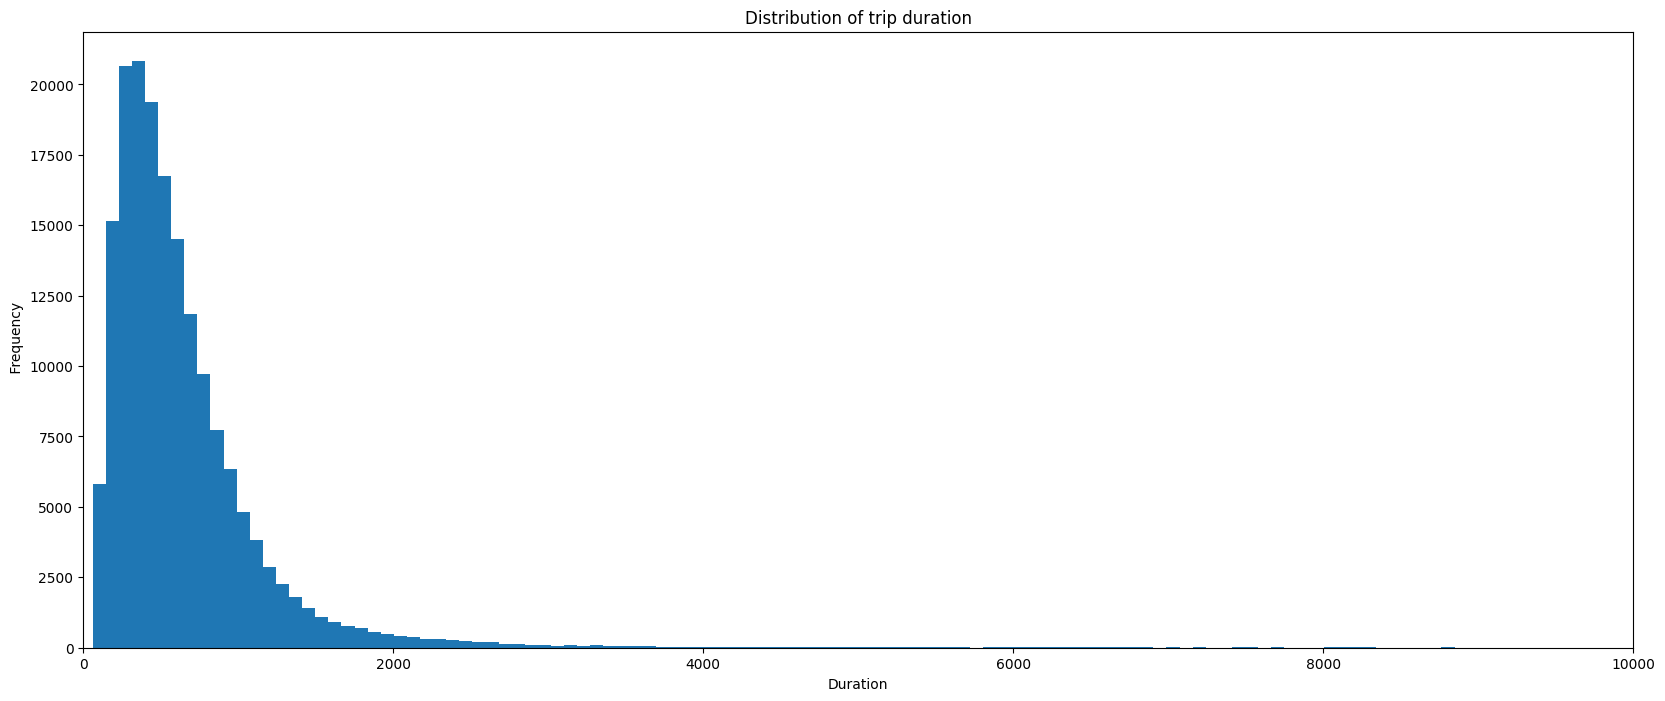

In [16]:
plt.figure(figsize=(20, 8))
plt.hist(data=df, x = 'duration_sec', bins=1000)
plt.xlim(0, 10000)
x_y_t('Duration',' Frequency', 'Distribution of trip duration')
plt.show()

> **NOTE:** Duration in seconds has a long-tailed distribution and was skewed to right. It is expected visualization from durations. Participants are tend to complete their trip. 

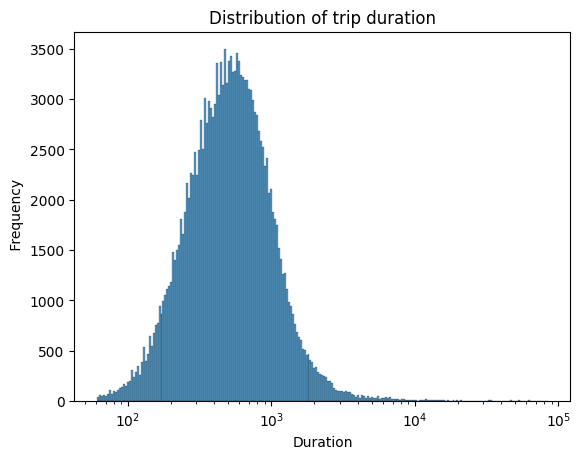

In [17]:
sb.histplot(data=df, x="duration_sec", log_scale=True);
x_y_t('Duration',' Frequency', 'Distribution of trip duration')

In [18]:
# Drop the outliers form dataframe

q = df["duration_sec"].quantile(0.995)
df = df[df["duration_sec"] < q]

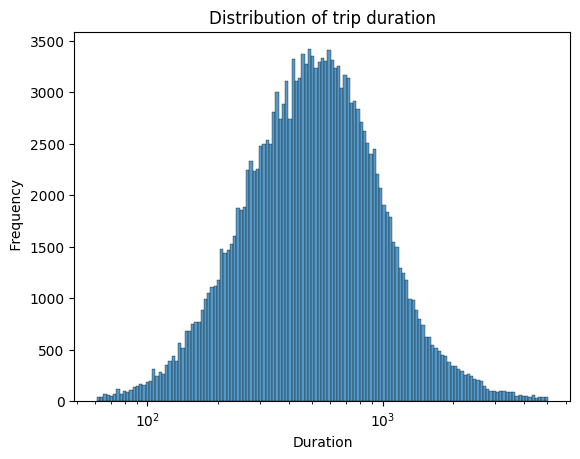

In [19]:
# New histogram of the duration

sb.histplot(data=df, x="duration_sec", log_scale=True);
x_y_t('Duration',' Frequency', 'Distribution of trip duration')

> When the x scale transformed to log10 data seems like normal distribution. But there are outliers. Then outliers are dropped from dataframe.

### 2. Observing the start hours of the trips by day

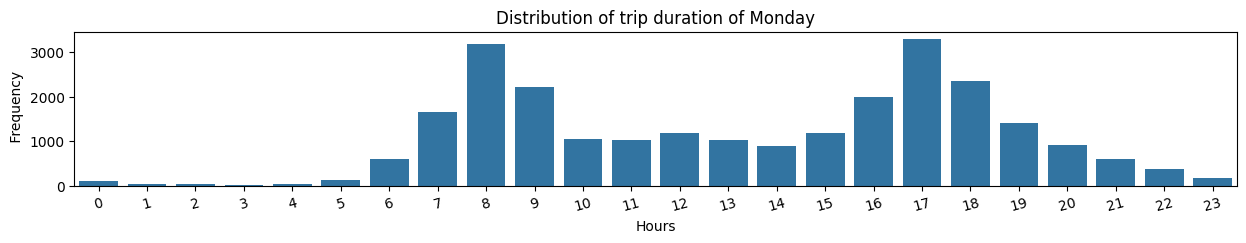

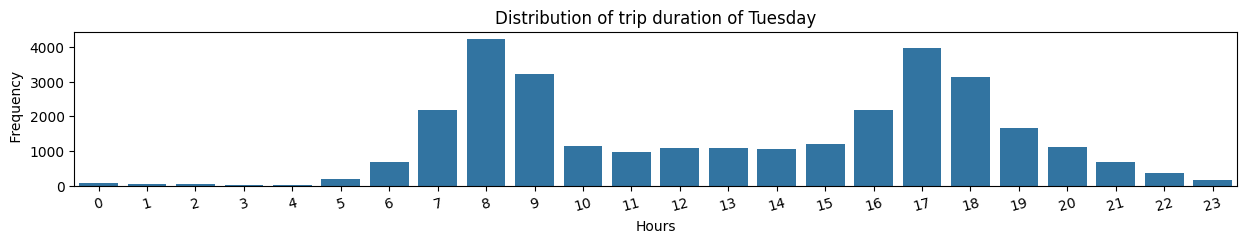

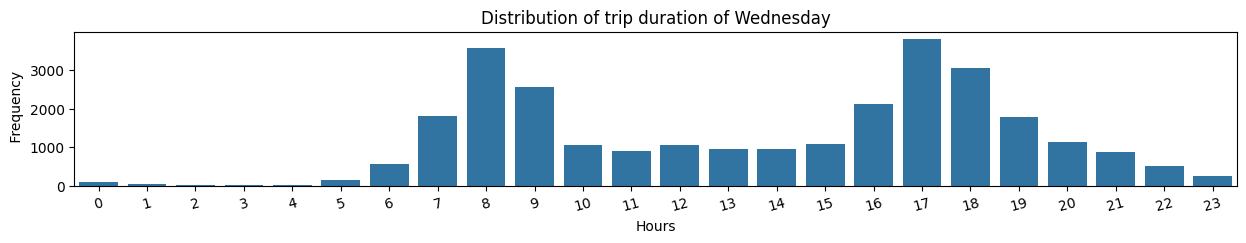

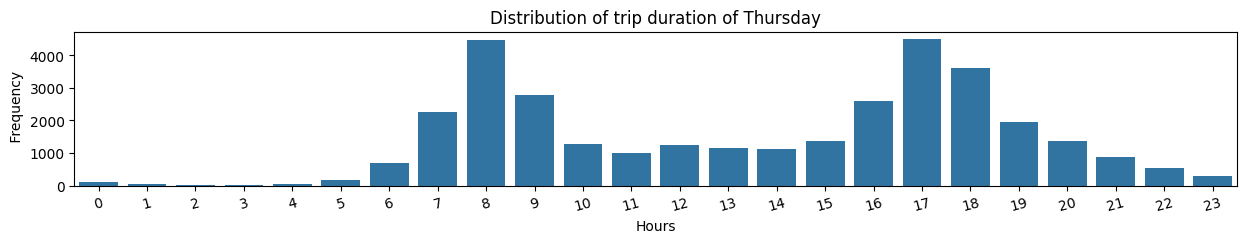

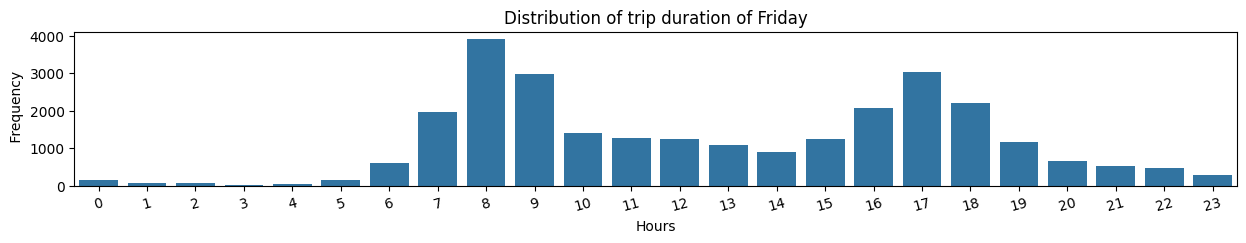

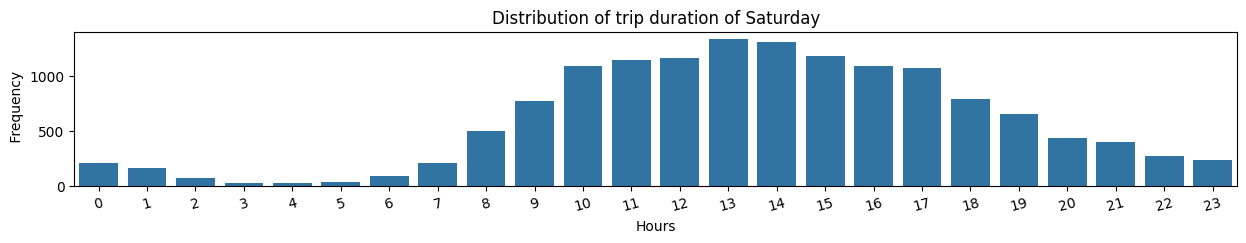

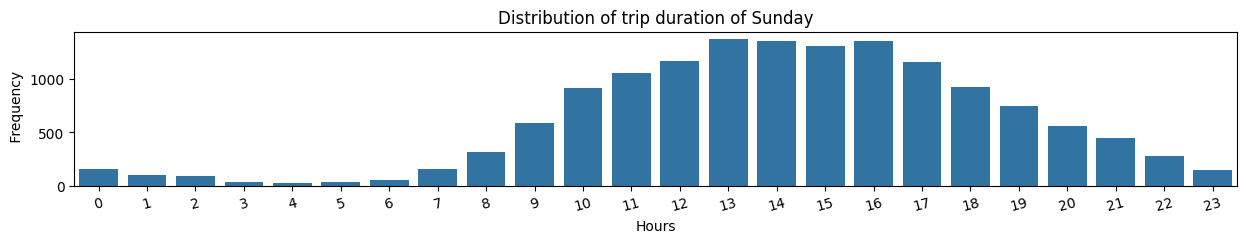

In [20]:
base_color = sb.color_palette()[0]
day_list = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for i in day_list:
    df_day = df.query("start_day == @i")
    plt.figure(figsize = [15, 2]) 
    sb.countplot(data=df_day, x='start_hour', color=base_color)
    plt.xticks(rotation = 15)
    #add xlabel, ylabel and title
    x_y_t('Hours',' Frequency', 'Distribution of trip duration of ' +i)
    plt.show()

> **NOTE:** Participants are tend to start their ride work-start-hours and work-finish-hours in weekdays. But, in weekends participants are tend to start their ride mid days hours. 

### 3. Observing the start day of the trips

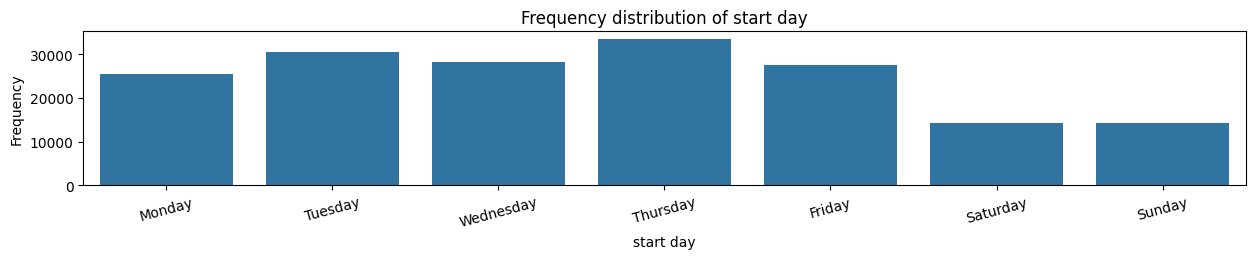

In [21]:
base_color = sb.color_palette()[0]

plt.figure(figsize = [15, 2]) 
sb.countplot(data=df, x='start_day', color=base_color)
plt.xticks(rotation = 15)
#add xlabel, ylabel and title
x_y_t('start day', 'Frequency', 'Frequency distribution of start day')

plt.show()

> **NOTE:** Specifically, most of the trips started on **Thursday** and **Tuesday**. However, the fewest number of trips were made on **weekends**. 

### 4. Observing the month of the trips

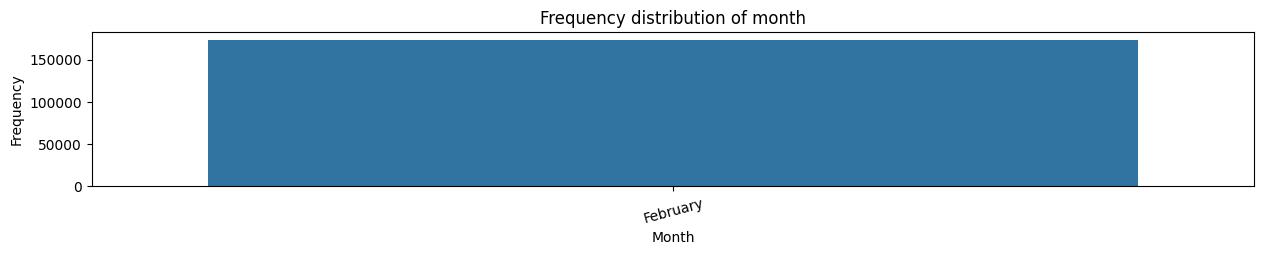

In [22]:
base_color = sb.color_palette()[0]

plt.figure(figsize = [15, 2]) 
sb.countplot(data=df, x='start_month', color=base_color)
plt.xticks(rotation = 15)
#add xlabel, ylabel and title
x_y_t('Month', 'Frequency', 'Frequency distribution of month')

plt.show()

> **NOTE:** At first, I didn't anticipate that there would be only one month in our dataset. 

### 6. Observing the days of the trips
Because of there is only one month this analysis will be available on February.

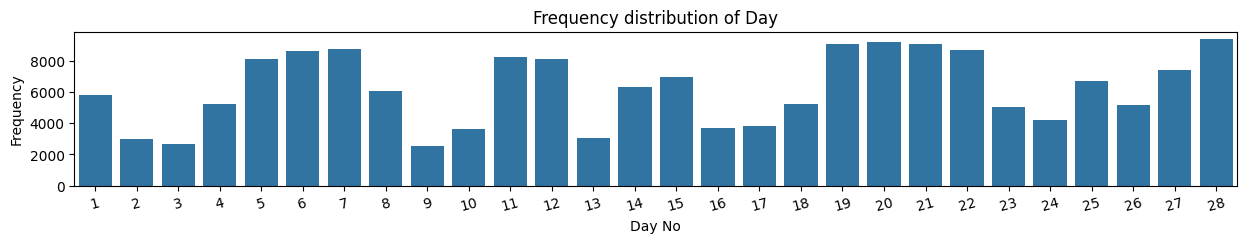

In [23]:
base_color = sb.color_palette()[0]

plt.figure(figsize = [15, 2]) 
sb.countplot(data=df, x='start_day_no', color=base_color)
plt.xticks(rotation = 15)
#add xlabel, ylabel and title
x_y_t('Day No', 'Frequency', 'Frequency distribution of Day')

plt.show()

> **NOTE:** I am not familiar to San Francisco Bay area. Top days (5-6-7 / 11-12 / 19-20-21-22 etc.) maybe match with national holidays or events etc. 

### 7. Observing the age of the trips

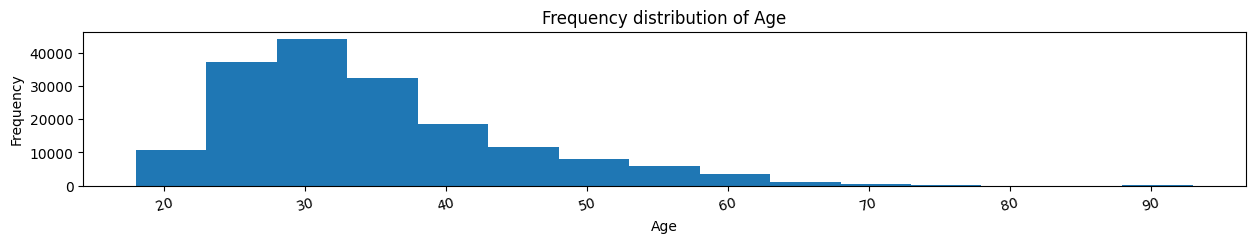

In [24]:
base_color = sb.color_palette()[0]

bins_age = np.arange(18,90+5, 5 )
plt.figure(figsize = [15, 2]) 
plt.hist(data=df, x = 'age', bins=bins_age)
plt.xticks(rotation = 15)
#add xlabel, ylabel and title
x_y_t('Age', 'Frequency', 'Frequency distribution of Age')

plt.show()

>The histogram shows that the age was skewed to the right. This skewness suggests that most of the bike riders, who participated in this trip were aged between 18 and 70 years, with very few participants who were aged above 70 years.

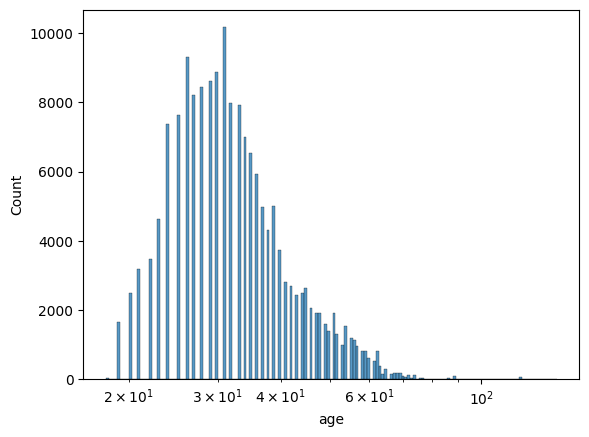

In [25]:
sb.histplot(data=df, x="age", log_scale=True);

> After transforming the x axsis as log data turned to normal distriburtion. But it seems like there are outlier. Now I will handle with outliers. 

In [26]:
# Drop the outliers form dataframe

q = df["age"].quantile(0.995)
df = df[df["age"] < q]

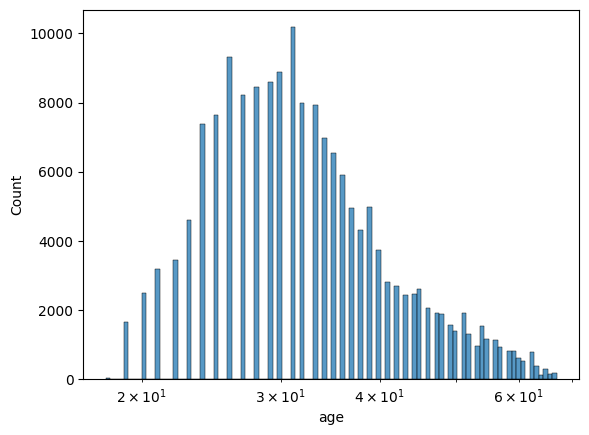

In [27]:
sb.histplot(data=df, x="age", log_scale=True);

> When the age was log-transformed, the data was approximately normally distributed with peaks between 20 and 65 years. 

### 8. Observing the gender of the trips

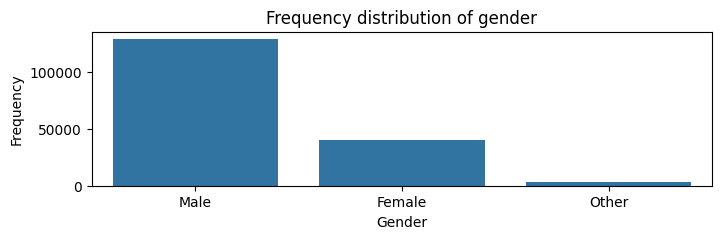

In [28]:
base_color = sb.color_palette()[0]

plt.figure(figsize = [8, 2]) 
sb.countplot(data=df, x='member_gender', color=base_color)
#add xlabel, ylabel and title
x_y_t('Gender', 'Frequency', 'Frequency distribution of gender')
plt.show()

> Males are higer than females. Also there are a few participants who didn't share their gender.

### 9. Looking at the user type of the trips

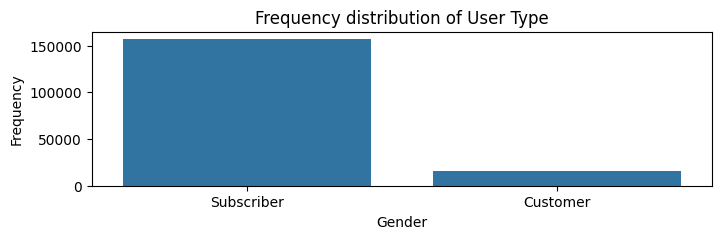

In [29]:
base_color = sb.color_palette()[0]

plt.figure(figsize = [8, 2]) 
sb.countplot(data=df, x='user_type', color=base_color)
#add xlabel, ylabel and title
x_y_t('Gender', 'Frequency', 'Frequency distribution of User Type')
plt.show()

> The bar chart shows that most of the participants in the Ford GoBike trip were subscribers rather than customers. 

### 10. Observing the start and end point of the trips

In [30]:
# Top 10 Start Station
df_start_station = df['start_station_id'].value_counts().sort_values(ascending=False)
df_start_station.head(10)

58    3635
67    3362
81    2905
21    2688
3     2580
30    2537
15    2487
22    2206
16    2175
5     2112
Name: start_station_id, dtype: int64

In [31]:
# Top 10 End Station
df_end_station = df['end_station_id'].value_counts().sort_values(ascending=False)
df_end_station.head(10)

67    4584
58    3693
21    3430
15    3108
3     2829
30    2824
81    2735
6     2310
16    2257
5     2137
Name: end_station_id, dtype: int64

> The list shows that there are common most using station for starting and ending like 58, 67, 21, 3.

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173051 entries, 4 to 183411
Data columns (total 26 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   index                    173051 non-null  int64         
 1   duration_sec             173051 non-null  int64         
 2   start_time               173051 non-null  datetime64[ns]
 3   end_time                 173051 non-null  datetime64[ns]
 4   start_station_id         173051 non-null  object        
 5   start_station_name       173051 non-null  object        
 6   start_station_latitude   173051 non-null  float64       
 7   start_station_longitude  173051 non-null  float64       
 8   end_station_id           173051 non-null  object        
 9   end_station_name         173051 non-null  object        
 10  end_station_latitude     173051 non-null  float64       
 11  end_station_longitude    173051 non-null  float64       
 12  bike_id         

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The trip duration variable was highly skewed to the right. However, after applying the log-transform, the data looked unimodal, with peak between 450 and 700. In addition. Age is not disturbed as normal. However, on transformation using log10, the data was unimodal with peak between 25 and 35 years. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Age showed unusual distribution, there are greater than 100 years old participants. Upper bounds (>%99,5) are defined each for duration and age. And these are removed from dataframe. 

## Bivariate Exploration


### 1. Relationship between duration and age

In [33]:
# Calculation of average of duration by age.
df_1 = df.groupby(['age', ]).agg({"duration_sec": [np.mean]})

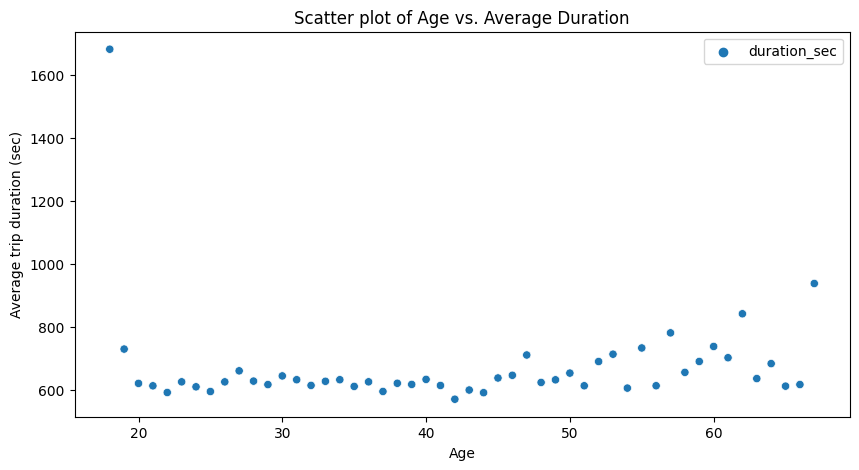

In [34]:
plt.figure(figsize=(10,5))
sb.scatterplot(data=df_1)

# add xlabel, ylabel and title
x_y_t('Age', 'Average trip duration (sec)', 'Scatter plot of Age vs. Average Duration')
plt.show()

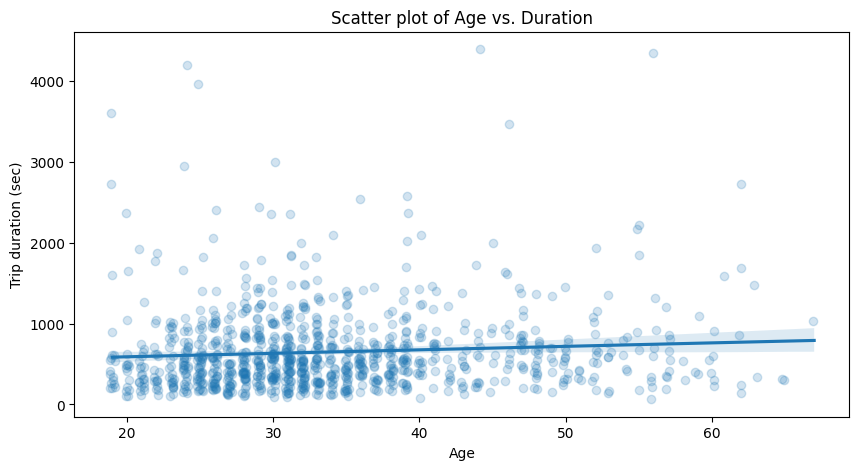

In [35]:
plt.figure(figsize=(10,5))
bike_samp=df.sample(1000, replace=False)
sb.regplot(x=bike_samp['age'], y=bike_samp['duration_sec'],  scatter_kws={'alpha':1/5}, x_jitter=0.2)

# add xlabel, ylabel and title
x_y_t('Age', 'Trip duration (sec)', 'Scatter plot of Age vs. Duration')
plt.show()

In [36]:
from sklearn.metrics import r2_score

r2_score(df['age'], df['duration_sec'])

-6439.550404667299

> 1. The average duration-age scatter plot shows that duration is increasing after 50s age. Also 18-19 ages are high duration average rate. Between 20-50 ages have a similar average duration as about 600 second.

> 2. Also, there is no linear relationship between age and trip duration. R Squre is not close to 1. 

### 2. Relation between Duratin & User Type

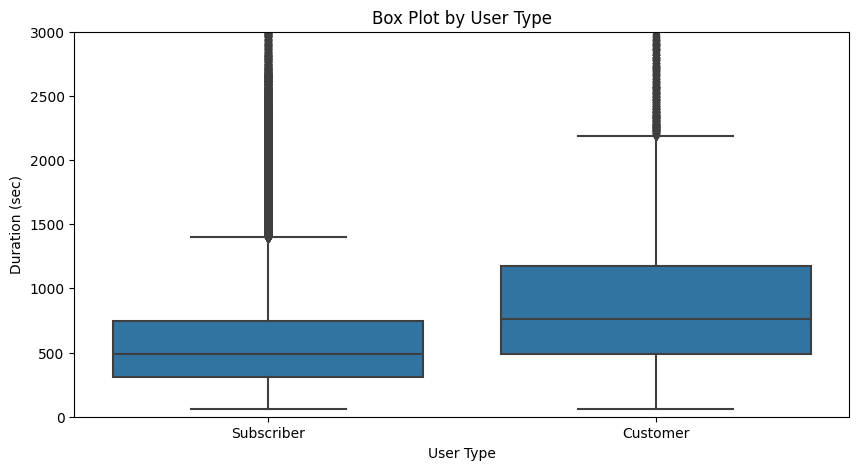

In [37]:
base_col=sb.color_palette()[0]
plt.figure(figsize=(10, 5))


#set y limit to 3000 sec to eliminate the effects of outliers 
plt.ylim(0, 3000)

sb.boxplot(x=df['user_type'], y=df['duration_sec'], color=base_col)

#add xlabel, ylabel and title
x_y_t('User Type', 'Duration (sec)', 'Box Plot by User Type')
#set y limit to 3000 sec to eliminate the effects of outliers 
plt.ylim(0, 3000)
plt.show()

> Based on the box plot, it is clear that subscribers took lesser time to complete the trip than customers. 

### 3. Relationship between age & usertype

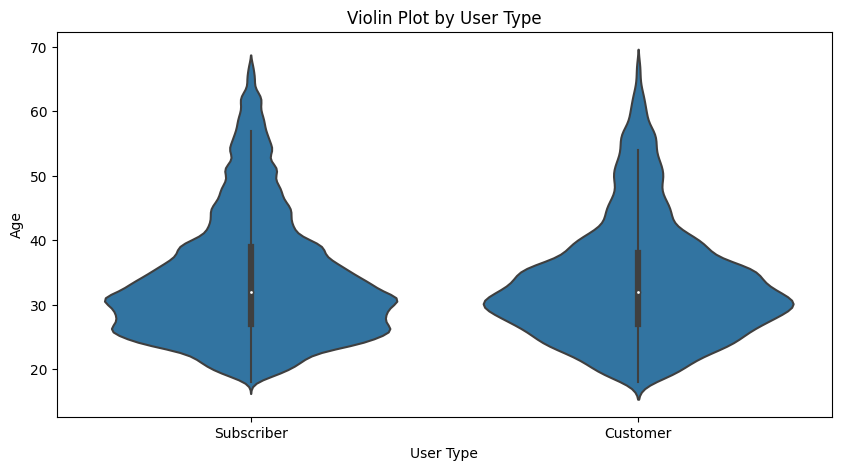

In [38]:
base_col=sb.color_palette()[0]
plt.figure(figsize=(10, 5))

sb.violinplot(x=df['user_type'], y=df['age'], color=base_col)

#add xlabel, ylabel and title
x_y_t('User Type', 'Age', 'Violin Plot by User Type')
plt.show()

> The violin plots shows that there was no difference in age between customers and subscribers. 

### 4. Relationship between Gender & Duration

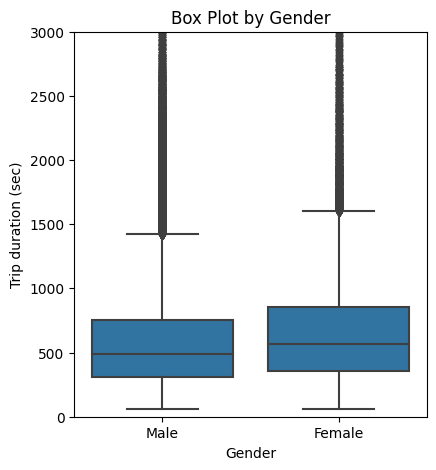

In [39]:
# filter bike data to only records where gender is male or female
df_4 =df[df['member_gender'].isin(['Male', 'Female'])]

#set the color
base_col=sb.color_palette()[0]
plt.figure(figsize=(10, 5))

plt.subplot(1,2,2)
sb.boxplot(x=df_4['member_gender'], y=df_4['duration_sec'], color=base_col)
#set the limit to 3000 sec to reduce the effects of outliers
plt.ylim(0, 3000)
#add xlabel, ylabel and title
x_y_t('Gender', 'Trip duration (sec)', 'Box Plot by Gender')

plt.show()

> Based on the box plots, even the male participants have low duration on their trips. But, staticaly analysis (paired sample t test) should be perform to say that "There is no difference between Male duration mean and Female duration mean significantly"  

### 5. relationship between Duration & Star Day

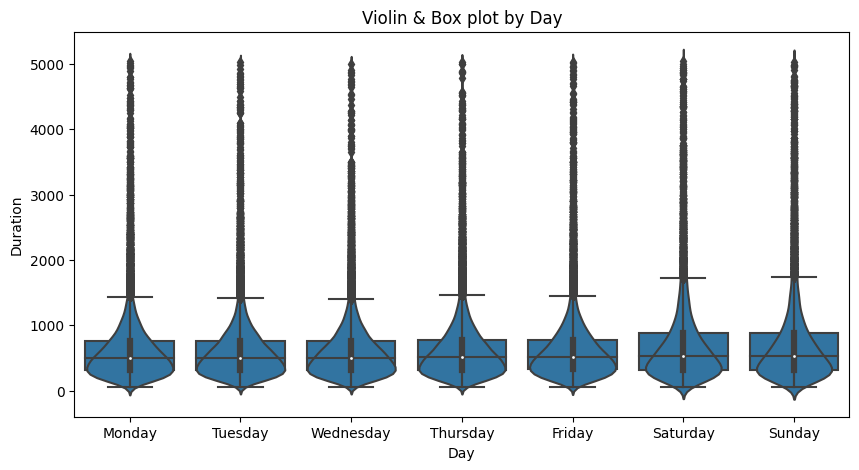

In [40]:
base_col=sb.color_palette()[0]
plt.figure(figsize=(10, 5))

sb.violinplot(x=df['start_day'], y=df['duration_sec'], color=base_col)
sb.boxplot(x=df['start_day'], y=df['duration_sec'], color=base_col)

#add xlabel, ylabel and title
x_y_t('Day', 'Duration', 'Violin & Box plot by Day')
plt.show()

> 1. violin&box plot showed that participants took more time to complete the trip on weekends (Saturday & Sunday) than other days of the week.

> 2. Also according to previous section 3 *(Looking at the start day of the trips)* and section 2 *(Looking at the start hours of the trips by day)*, participants have less count of ride weekends. It means that, even the less participants are performingride on weekends, they are rent to ride long duration at mid-day hours.

### 6. Relationship between Gender & User Type

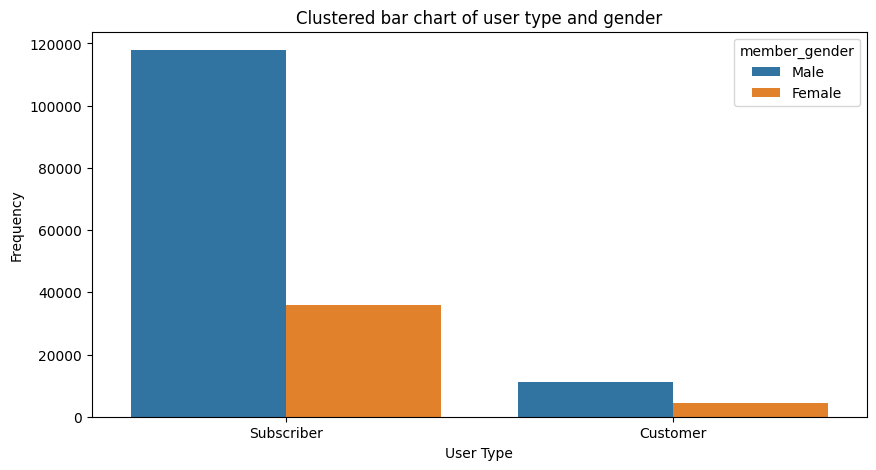

In [41]:
plt.figure(figsize=(10,5))

sb.countplot(data=df_4, x ='user_type', hue='member_gender')

#add xlabel, ylabel and title
x_y_t('User Type', 'Frequency', 'Clustered bar chart of user type and gender')
plt.show()

> 1. The clustered bar chart shows that there is more males than females both in the customer and subscriber category. 

> 2. Statical analysis can be perform to define "Is there any significant difference between frequecy of male and frequecny of female" or "rate of male/female on subscriber is equal to rate of male/female on customer"

### 7. Relationship between Bike Share & Duration

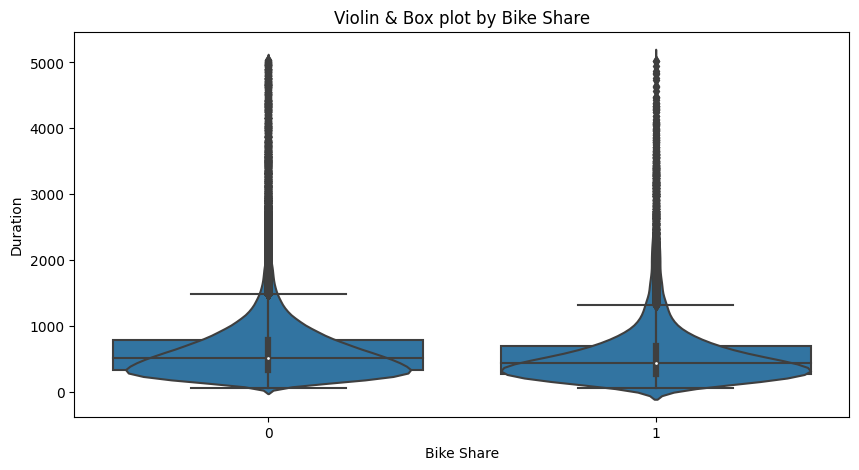

In [42]:
base_col=sb.color_palette()[0]
plt.figure(figsize=(10, 5))

sb.violinplot(x=df['bike_share_for_all_trip'], y=df['duration_sec'], color=base_col)
sb.boxplot(x=df['bike_share_for_all_trip'], y=df['duration_sec'], color=base_col)

#add xlabel, ylabel and title
x_y_t('Bike Share', 'Duration', 'Violin & Box plot by Bike Share')
plt.show()

> The plot showed that those who shared bike took slightly lesser time than those who did not share the bikes.

### 8. Relationship Between Gender & Age

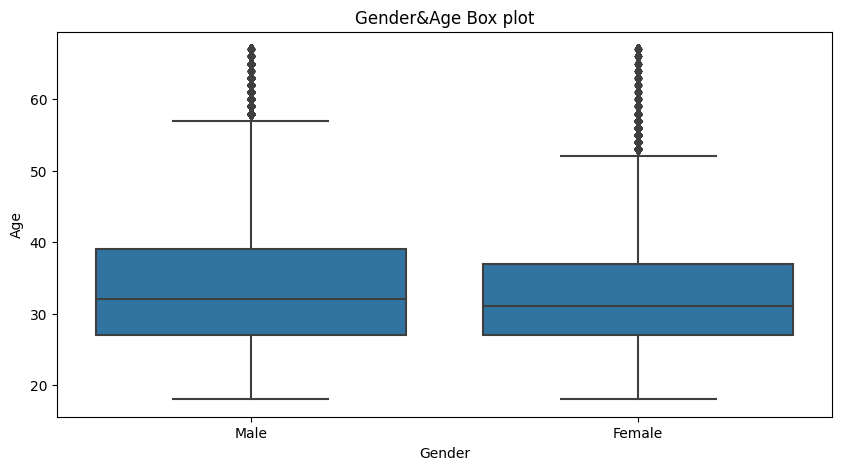

In [43]:
base_col=sb.color_palette()[0]
plt.figure(figsize=(10, 5))

sb.boxplot(x=df_4['member_gender'], y=df['age'], color=base_col)

#add xlabel, ylabel and title
x_y_t('Gender', 'Age', 'Gender&Age Box plot')
plt.show()

> Females are slightly younger than Males. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Bivariate visualization showed that there is no relationship between age and trip duration. Duration is increasing after 50s age. Also 18-19 ages are high duration average rate. Between 20-50 ages have a similar average duration as about 600 second. The analysis also showed that individuals who were bike customers took slightly more time to complete the trip compared to subscribers. The bivariate visualization also revealed no difference in age between customers and subscribers. This suggests that there was no difference in age distribution between customers and subscribers. Moreover, bivariate analysis showed that the number of customers and subscibers was high among males than among females. We also found that the riders are more tend to long drive at weekends, especially mid-day hours. Also, riders are use the bike work start and work out hours than mid-day hours at weekdays.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Basides the main features of interest, this study examined the association between bike share for all trips and duration in seconds. The results showed that those who shared bike took slightly lesser time than those who did not share the bikes.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### 1. Relationship between Days & Station & Count of Station

In [44]:
# Count of start station by day
df_8 = df.groupby(['start_day','start_station_id'])['start_station_id'].count().sort_values(ascending=False).reset_index(name='count')

In [45]:
# create df for each day 
df_sun = df_8.query('start_day == "Sunday"').head(10)
df_mon = df_8.query('start_day == "Monday"').head(10)
df_tue = df_8.query('start_day == "Tuesday"').head(10)
df_wed = df_8.query('start_day == "Wednesday"').head(10)
df_thu = df_8.query('start_day == "Thursday"').head(10)
df_fri = df_8.query('start_day == "Friday"').head(10)
df_sat= df_8.query('start_day == "Saturday"').head(10)

In [46]:
# join all df into one df
df_all_week = pd.concat([df_sun, df_mon, df_tue, df_wed, df_thu, df_fri, df_sat])


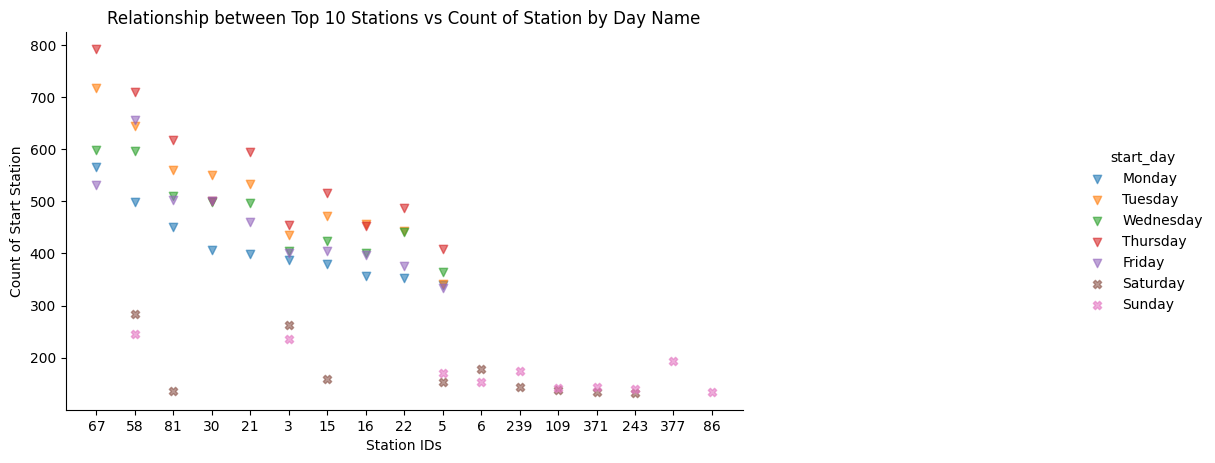

In [47]:

#scatter plot of Station vs Count of Station by Day Name
g = sb.FacetGrid(data = df_all_week, hue = 'start_day', hue_kws=dict(marker=["v","v","v","v","v","X","X"]))
g.map(plt.scatter, 'start_station_id', 'count', alpha=0.6)
g.add_legend()

## Set Plot Dimensions - FIGURE LEVEL
g.fig.set_size_inches(15, 5)
#add xlabel, ylabel and title
x_y_t('Station IDs', 'Count of Start Station', 'Relationship between Top 10 Stations vs Count of Station by Day Name')

plt.show()

> 1. As we know that weekends are more less driving than weekdays (please see previeous capter 3. Looking at the start day of the trips). For this reason weekends **(x)** are less count of start station if we compare with weekdays. 

> 2. The most popular stations are 58 and 3 stations in weekends. 

> 3. Even the 67 is not popular in weekends, it is the most popular station in weekdays. 

> 4. 58 is the most popular station weekends and weekdays. 

### 2. Relationship Between Gender & Age & Duration

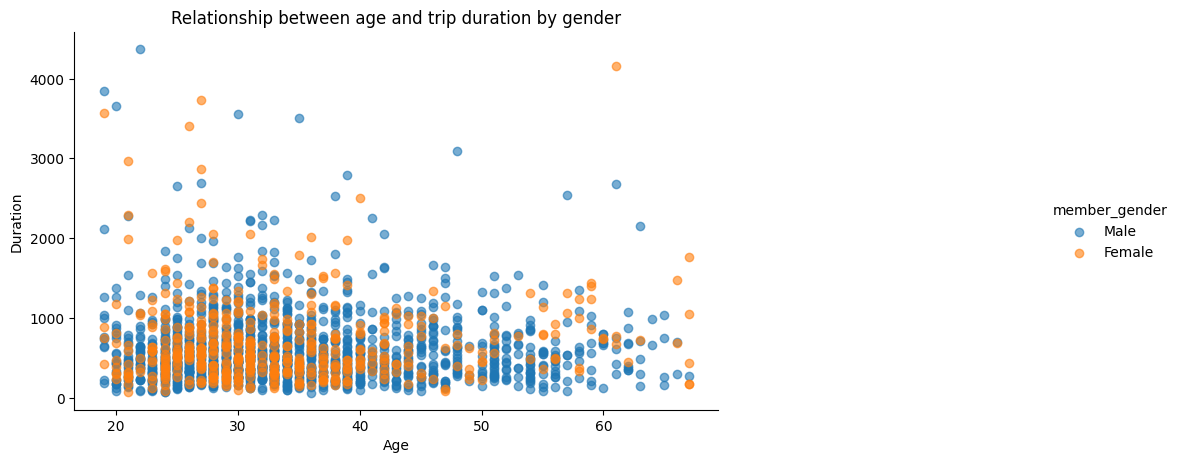

In [48]:
sample_data=df_4.sample(n=2000, replace = False)
g = sb.FacetGrid(data = sample_data, hue = 'member_gender')
g.map(plt.scatter, 'age', 'duration_sec', alpha=0.6)
g.add_legend()

g.fig.set_size_inches(15, 5)
x_y_t('Age', 'Duration', 'Relationship between age and trip duration by gender')
plt.show()

> Plot shows that there is an interaction between male and female ages but no interaction with trip duration. 

### 3. Relationship between Gender & Week Day & Mean of Duration

In [49]:
df_9 = df_4.groupby(['start_day','member_gender'])['duration_sec'].mean().sort_values(ascending=False).reset_index(name='mean')

In [50]:
df_sun = df_9.query('start_day == "Sunday"')
df_mon = df_9.query('start_day == "Monday"')
df_tue = df_9.query('start_day == "Tuesday"')
df_wed = df_9.query('start_day == "Wednesday"')
df_thu = df_9.query('start_day == "Thursday"')
df_fri = df_9.query('start_day == "Friday"')
df_sat= df_9.query('start_day == "Saturday"')

In [51]:
df_all_week = pd.concat([df_sun, df_mon, df_tue, df_wed, df_thu, df_fri, df_sat])

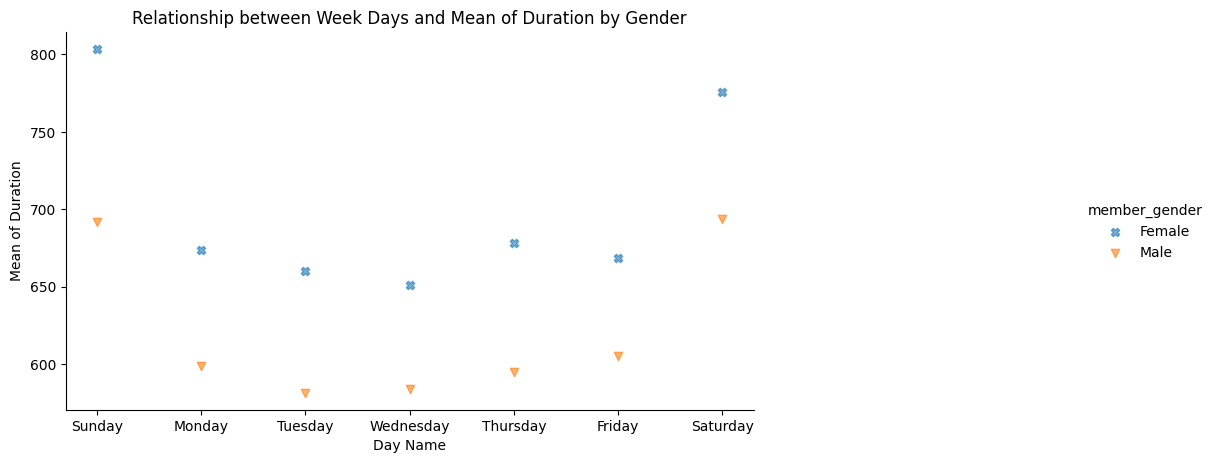

In [52]:
#scatter plot of Station vs Count of Station by Day Name
g = sb.FacetGrid(data = df_all_week, hue = 'member_gender', hue_kws=dict(marker=["X","v","v","v","v","v","X"]))
g.map(plt.scatter, 'start_day', 'mean', alpha=0.6)
g.add_legend()

## Set Plot Dimensions - FIGURE LEVEL
g.fig.set_size_inches(15, 5)
#add xlabel, ylabel and title
x_y_t('Day Name', 'Mean of Duration', 'Relationship between Week Days and Mean of Duration by Gender')

plt.show()

> Each day male driver's duration is less than female driver's duration.

### 4. Relationship between Age Cluster & Week Day & Count of Ride

In [53]:
# Age cluster
df.loc[df['age'] >= 50, 'age_cluster'] = "Elder"
df.loc[((df['age'] < 50) & (df['age'] >= 35)), 'age_cluster'] = "Midlifer"
df.loc[df['age'] < 35, 'age_cluster'] = "Younger"

In [54]:
df_7 = df.groupby(['start_day','age_cluster'])['duration_sec'].mean().sort_values(ascending=False).reset_index(name='count')

In [55]:
df_sun = df_7.query('start_day == "Sunday"')
df_mon = df_7.query('start_day == "Monday"')
df_tue = df_7.query('start_day == "Tuesday"')
df_wed = df_7.query('start_day == "Wednesday"')
df_thu = df_7.query('start_day == "Thursday"')
df_fri = df_7.query('start_day == "Friday"')
df_sat= df_7.query('start_day == "Saturday"')

In [56]:
df_all_week = pd.concat([df_sun, df_mon, df_tue, df_wed, df_thu, df_fri, df_sat])

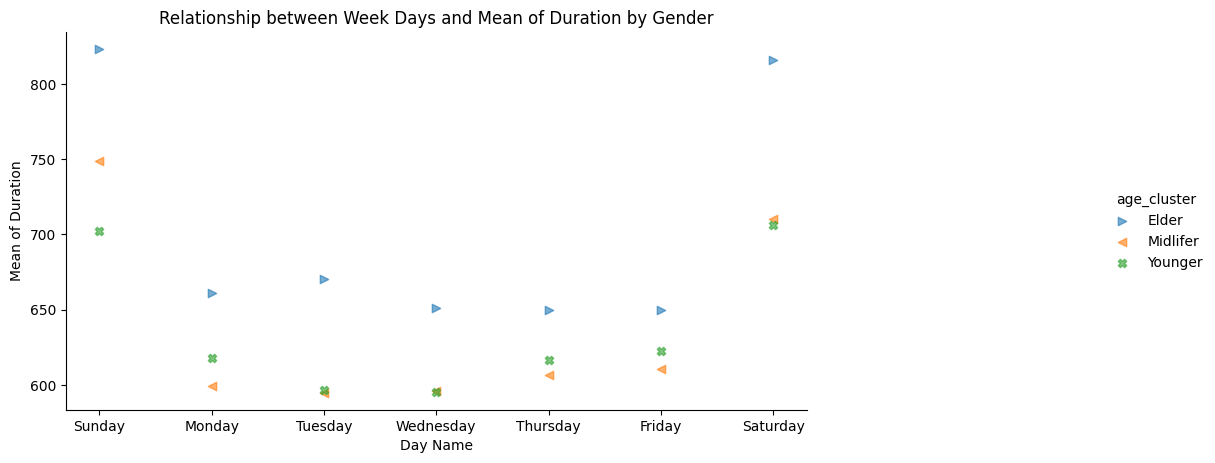

In [57]:
#scatter plot of Station vs Count of Station by Day Name
g = sb.FacetGrid(data = df_all_week, hue = 'age_cluster', hue_kws=dict(marker=[">","<","X"]))
g.map(plt.scatter, 'start_day', 'count', alpha=0.6)
g.add_legend()

## Set Plot Dimensions - FIGURE LEVEL
g.fig.set_size_inches(15, 5)
#add xlabel, ylabel and title
x_y_t('Day Name', 'Mean of Duration', 'Relationship between Week Days and Mean of Duration by Gender')

plt.show()

> 1. Elder members have greater duration than midlifers and youngers.

> 2. Durations gets long at weekends. But Elder members have much duration than youngers and midlifers. 

### 5. Relationship Between Gender and Duration by User Type

c:\Users\bense\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


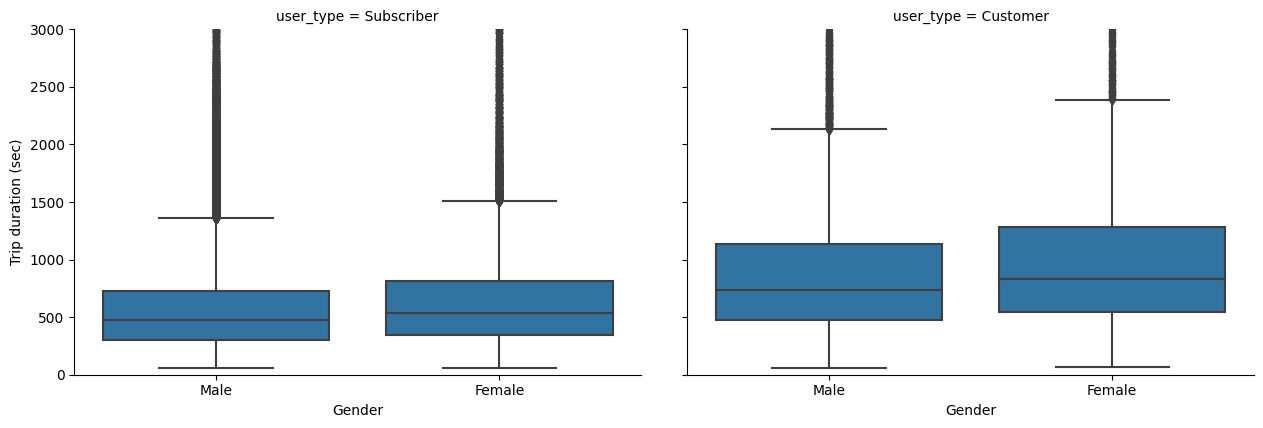

In [58]:
g = sb.FacetGrid(data = df_4, col = 'user_type')
g.map(sb.boxplot, 'member_gender', 'duration_sec')
g.set(ylim=(0,3000))
g.set(ylabel='Trip duration (sec)')
g.set(xlabel='Gender')
## Set Plot Dimensions - FIGURE LEVEL
g.fig.set_size_inches(14, 5)

plt.show()

> Relationship between user type, gender and trip duration is investigated. It showed that regardless of the user type, male participants took lesser time to complete the trip than females. Additionally, Subscriber user type is less duration than customer user type.

### 6. Relationship between Top 10 Stations vs Count of Station by Start/End Station

In [59]:
df_start_station = df_start_station.to_frame().head(10).reset_index()
df_start_station['Info'] = "Start Station"
df_start_station['count'] = df_start_station['start_station_id']


In [60]:
df_end_station = df_end_station.to_frame().head(10).reset_index()
df_end_station['Info'] = "End Station"
df_end_station['count'] = df_end_station['end_station_id']

In [61]:
df_stations = pd.concat([df_start_station, df_end_station])

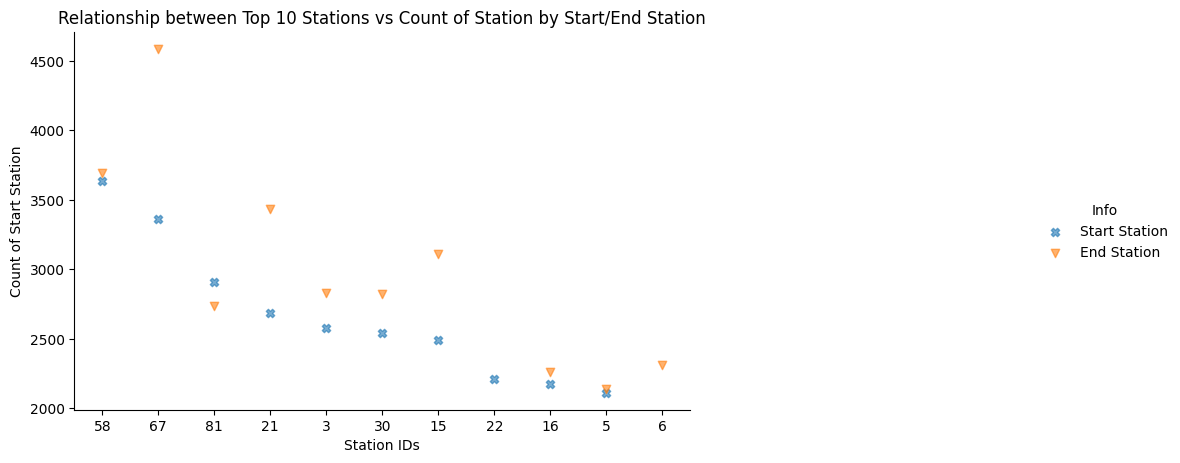

In [62]:
#scatter plot of Station vs Count of Station by Day Name
g = sb.FacetGrid(data = df_stations, hue = 'Info', hue_kws=dict(marker=["X","v"]))
g.map(plt.scatter, 'index', 'count', alpha=0.6)
g.add_legend()

## Set Plot Dimensions - FIGURE LEVEL
g.fig.set_size_inches(15, 5)
#add xlabel, ylabel and title
x_y_t('Station IDs', 'Count of Start Station', 'Relationship between Top 10 Stations vs Count of Station by Start/End Station')

plt.show()

> Station 58 is the most popular station each start and end station. The most popular station for end station is 67 and for start station is 58. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The multivariate exploration showed conditioned on user type, male participants took lesser time to complete the trip than females. Also, subscriber user type is less duration than customer user type.

### Were there any interesting or surprising interactions between features?

>  Suprising interactions was found between frequecy of station, station ID and week days. Some of stations are not using weekends even the in top 10 in weekdays. In particular, average duration of age groups are diffrerent. Younger riders are tend to finish their ride quickly. In adition of these, males duraiton is less than females and difference of duration is not changing by day.  

## Conclusions
> I looked at the Ford Gobike data to find out interesting connections and how the different factors are spread out. I used different kinds of charts and graphs to help us understand the data better, like one-variable, two-variable, and more-than-two-variable charts. After going through all this, I found some important results.

* Participants usually begin their work during the standard work hours on weekdays, but on weekends, they tend to start their activities around midday.

* In particular, the majority of journeys commenced on Thursdays and Tuesdays. Nevertheless, the fewest trips took place on the weekends.

* I don't know the San Francisco Bay area well. The best days of February (5-6-7 / 11-12 / 19-20-21-22, etc.) might coincide with national holidays or events, and so on.

* In this journey, the majority of cyclists were between 18 and 70 years old, and only a small number of participants were over 70 years old.

* Men have a higher representation than women. Additionally, there are a few participants who did not disclose their gender.

* The bar graph illustrates that the majority of Ford GoBike trip participants were subscribers, as opposed to being customers.

* The list demonstrates that certain stations, such as 58, 67, 21, and 3, are the most frequently used both for starting and ending trips.

* The average duration according to age reveals that after the age of 50, the duration of trips tends to increase. Additionally, ages 18-19 show a higher average trip duration. The age group between 20 and 50 exhibits a fairly consistent average trip duration, hovering around 600 seconds.

* It is evident that subscribers take less time to complete their trips compared to customers.

* There is no significant age difference between customers and subscribers.

* Participants take more time to complete their trips on weekends (Saturday and Sunday) compared to other days of the week.

* Shared bike users generally complete their trips in slightly less time than those who do not share bikes.

* Firstly, it's important to note that there are fewer trips on weekends compared to weekdays, as mentioned in the previous chapter (Chapter 3: "Looking at the start day of the trips"). This is why the count of trips starting from stations on weekends is lower when compared to weekdays.

* The most popular stations on weekends are stations 58 and 3.

* Even though station 67 is not as popular on weekends, it is the most popular station on weekdays.

* Station 58 holds the title of the most popular station both on weekends and weekdays.

* Each day, male drivers have shorter trip durations compared to female drivers.

* Firstly, older members tend to have longer trip durations than middle-aged and younger members.

* Trip durations tend to be longer on weekends, but older members still have longer durations compared to younger and middle-aged members.

* Station 58 is the most popular station each start and end station. The most popular station for end station is 67 and for start station is 58.